In [40]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
# Replace 'your_data.csv' with the path to your actual data file
train_df = pd.read_csv('Data/train.csv')

# Perform basic exploratory data analysis
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


| Variable | Definition | Key |
| --- | --- | --- |
| survived | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex | |
| Age | Age in years | |
| sibsp | # of siblings / spouses aboard the Titanic | |
| parch | # of parents / children aboard the Titanic | |
| ticket | Ticket number | |
| fare | Passenger fare | |
| cabin | Cabin number | |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |


Pclass: 
A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

Sibsp: 
The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

Parch: 
The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them

In [41]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are 891 instances in the datasets. There many missing values in the cabin as well as a age.

Let's take a look at theese and clean them. 


In [42]:
missing_data = train_df.isnull().sum().sort_values(ascending=False)

missing_percent = (train_df.isnull().sum()/train_df.isnull().count()*100).sort_values(ascending=False)

missing_data = pd.DataFrame({'Total': missing_data, '%': missing_percent})

missing_data.head(5)

,Total,%
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000


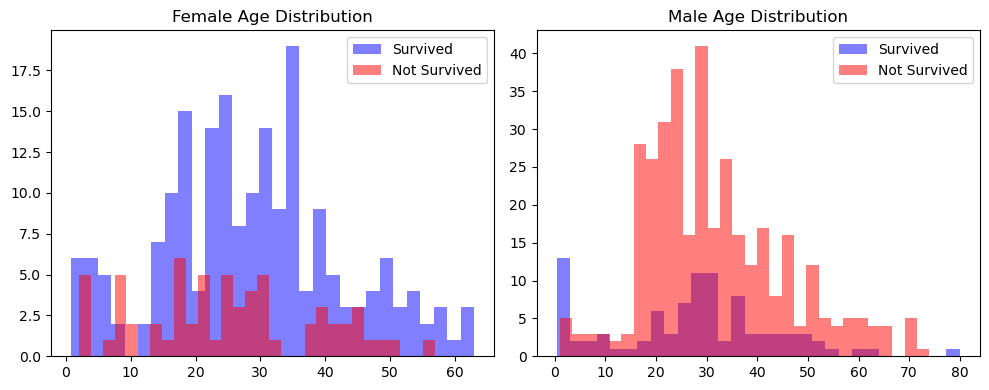

In [59]:
import matplotlib.pyplot as plt

# Filter the DataFrame for people who survived
survived_df = train_df[train_df['Survived'] == 1]
not_survived_df = train_df[train_df['Survived'] == 0]

# Filter the DataFrame for male and female survivors
male_survivors = survived_df[survived_df['Sex'] == 'male']
female_survivors = survived_df[survived_df['Sex'] == 'female']

# Filter the DataFrame for male and female non-survivors
male_not_survived = not_survived_df[not_survived_df['Sex'] == 'male']
female_not_survived = not_survived_df[not_survived_df['Sex'] == 'female']

# Create histograms
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axes[0].hist(female_survivors['Age'].dropna(), bins=30, alpha=0.5, color='blue', label='Survived')
axes[0].hist(female_not_survived['Age'].dropna(), bins=30, alpha=0.5, color='red', label='Not Survived')
axes[0].set_title('Female Age Distribution')
axes[0].legend()

axes[1].hist(male_survivors['Age'].dropna(), bins=30, alpha=0.5, color='blue', label='Survived')
axes[1].hist(male_not_survived['Age'].dropna(), bins=30, alpha=0.5, color='red', label='Not Survived')
axes[1].set_title('Male Age Distribution')
axes[1].legend()

plt.tight_layout()
plt.show()


In [50]:
male_survivors.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S


In [52]:
female_survivors.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


The Embarked feature has only 2 missing values, which can easily be filled. 

It will be much more tricky, to deal with the ‘Age’ feature, which has 177 missing values. 

The ‘Cabin’ feature needs further investigation, but it looks like that we might want to drop it from the dataset, since 77 % of it are missing.

From the description above we we can see th
- A total of 2,224 people sailed on the maiden voyage of the Titanic, our dataset consist of 891 people.
- Survived can be cateogorised as either 1 or 0
- looking at the age, 75 % of the passengers had an age below 38. This implies that therere are few elderly people
- looking at the p class, 75 % of passensgers had low social class. 

In [6]:
#df.describe(include=['O']) will provide summary statistics for the object columns in the dataset
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


This is a summary of the categorical variables in your dataset. Here's an analysis of each:

- Name: All 891 entries are unique, which makes sense as each passenger would have a different name. The top name (most frequent) is "Braund, Mr. Owen Harris", but it only appears once, confirming that all names are unique.

- Sex: There are 2 unique values, indicating that the dataset includes males and females. Males are the majority, with 577 out of 891 passengers (approximately 65%).

- Ticket: There are 681 unique ticket numbers among the 891 passengers. The most common ticket number is "347082", which is shared by 7 passengers. This could indicate group travel or ticket duplication.

- Cabin: Only 204 out of 891 passengers have a recorded cabin number, and there are 147 unique cabin numbers. The most common cabin is "B96 B98", shared by 4 passengers. This could indicate shared cabins or data entry duplication.

- Embarked: This indicates the port of embarkation. There are 3 unique values, and 2 missing values (891 - 889). The most common port is "S" (Southampton), where the majority of passengers embarked.

This summary provides a good starting point for further analysis. For example, we might want to explore the relationship between gender and survival rate, or between cabin number and ticket fare.

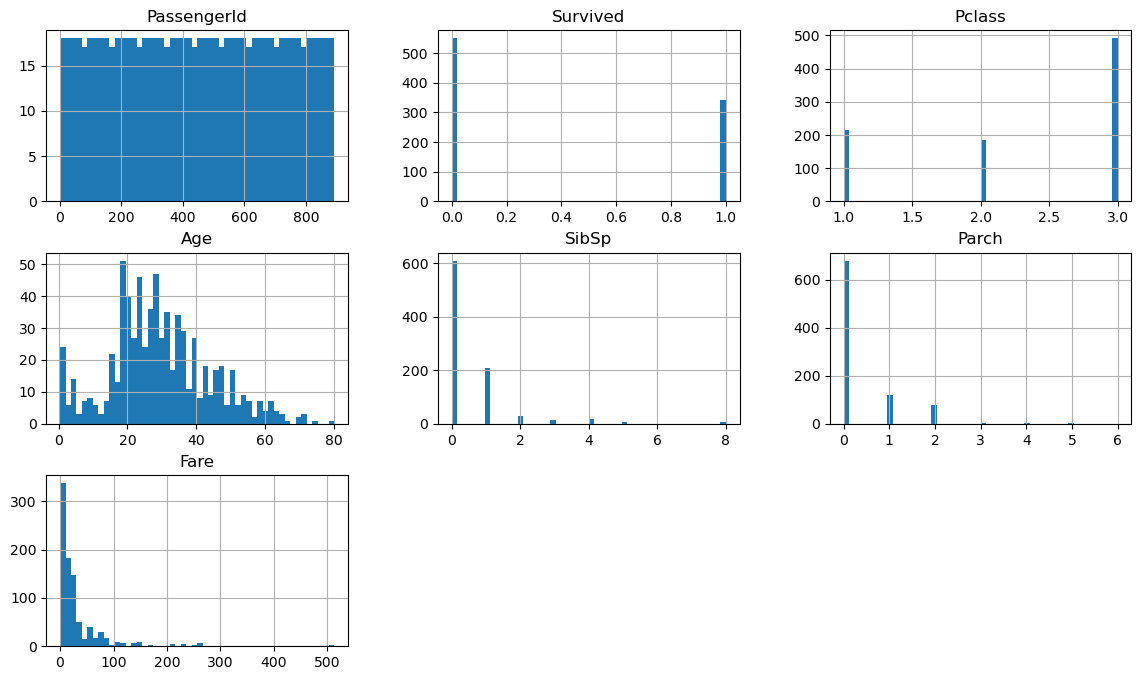

In [7]:
#let's visulize this in a histogram
df.hist(bins=50, figsize=(14, 8))

plt.show()

In [16]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix['Survived'].sort_values(ascending=False)


Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64